# 3.3.2 - Random Forest - Bagging - Método Ensemble.


* En este Notebook vamos a ver los ***que es el Random Forest*** y vamos a ***resolver un problema de clasificación usando*** la implementación de este "***meta-algoritmo***" con la ***librería de scikit-learn***.


* Vamos a tratar los siguientes puntos:
<span></span><br>
    1. [Random Forest](#M1)
<span></span><br>
    2. [Ejemplo de Clasificación de Pacientes con Diabetes](#M2)
    <span></span><br>
        2.1. [Carga de datos](#M21)
    <span></span><br>
        2.2. [Cambio de estructura de datos a numpy y Particionado de datos en Entrenamiento y Test](#M22)
    <span></span><br>
        2.3. [Visualización de los datos](#M23)
    <span></span><br>
        2.4. [Creacción y ajuste de los modelos](#M24)
    <span></span><br>
        2.5. [Visualización de los Árboles obtenidos](#M25)
    <span></span><br>
        2.6. [Evaluación de los modelos](#M26)
    <span></span><br>
        2.7. [Conclusiones](#M27)


<hr>


## <a name="M1">1. Random Forest</a>


* El "***Random Forest***" es un Meta-Algoritmo de Aprendizaje (Método Ensemble) que ***utiliza como Algoritmo de Aprendizaje los CART*** *\[Classification And Regression Trees\]* para generar una ***colección de modelos*** entrenados de manera independientes con subconjuntos de elementos del Dataset de entrenamiento.


* La ***predicción final será la moda*** (para problemas de clasificación) ***o la media*** (para problemas de regresión) ***de todas las predicciones independientes de la colección de modelos***.


## <a name="M2">2. Ejemplo de Clasificación de Pacientes con Diabetes</a>

* En el siguiente ejemplo vamos a Clasificar a las personas en Diabéticas y no Diabéticas en función de una serie de variables usando el ***Random Forest*** implementado en la librería de Scikit-Learn:


* Para resolver el problema de Clasificación vamos a utilizar la clase **"RandomForestClassifier()"**, cuya documentación esta en el siguiente enlace:<br>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


* Como puede observarse la clase "RandomForestClassifier()" es una implementación del *Random Forest* para resolver problemas de clasificación ya que utilizará los Arboles de Decisión para generar modelos destinados a resolver problemas de clasificación. Para la resolución de problemas de Regresión existe la clase *RandomForestRegressor()* que se menciona en este punto a modo informativo.


* El **"RandomForestClassifier()"** acepta una serie de parámetros destacando los siguientes:
<span></span><br><br>
    + n_estimators: Numero de modelos (arboles de decisión) a generar.
<span></span><br><br>
    + bootstrap (boolean): Indica si queremos que cada modelo sea entrenado por un subconjunto de elementos del Dataset de entrenamiento (por remplazo) o si entrenamos todos los modelos con todo el Dataset disponible.
<span></span><br><br>
    + criterion: (hiperparámetro del CART){'gini', 'entropy'} es la medida de calidad a utilizar para la división o la decisión del árbol.
<span></span><br><br>
    + max_depth: (hiperparámetro del CART) es la profundidad máxima que pueden tener los árboles.
    
    
    
* Para realizar esta clasificación vamos a tener las siguientes variables de los pacientes:

    - ***Pregnancies***: Number of times pregnant
    - ***GlucosePlasma***: glucose concentration
    - ***BloodPressure***: Diastolic blood pressure
    - ***SkinThickness***: Triceps skin fold thickness
    - ***Insulin***: 2-Hour serum insulin
    - ***BMI***: Body mass index 
    - ***DiabetesPedigreeFunction***: Diabetes pedigree function
    - ***Age***: Age
    - ***OutcomeClass***: variable (0 or 1) 268 of 768 are 1, the others are 0


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    2.1. [Carga de datos](#M21)
<span></span><br>
    2.2. [Cambio de estructura de datos a numpy y Particionado de datos en Entrenamiento y Test](#M22)
<span></span><br>
    2.3. [Visualización de los datos](#M23)
<span></span><br>
    2.4. [Creacción y ajuste de los modelos](#M24)
<span></span><br>
    2.5. [Visualización de los Árboles obtenidos](#M25)
<span></span><br>
    2.6. [Evaluación de los modelos](#M26)
<span></span><br>
    2.7. [Conclusiones](#M27)


* En primer lugar vamos a importar las librería necesarias:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pydotplus
import collections

from IPython.display import Image

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import export_graphviz
%matplotlib inline 

<hr>


### <a name="M21">2.1. Carga de datos</a>

* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "../../data/diabetes.csv"

In [2]:
df = pd.read_csv("../../data/diabetes.csv")
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
205,5,111,72,28,0,23.9,0.407,27,0
748,3,187,70,22,200,36.4,0.408,36,1
683,4,125,80,0,0,32.3,0.536,27,1
577,2,118,80,0,0,42.9,0.693,21,1
133,8,84,74,31,0,38.3,0.457,39,0


<hr>

### <a name="M22">2.2. Cambio de estructura de datos a numpy y Particionado de datos en Entrenamiento y Test</a>


In [3]:
# Paso a Numpy
x_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
              'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[x_features].values
y = df['Outcome'].values 

# División de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<hr>


### <a name="M23">2.3. Visualización de los datos</a>


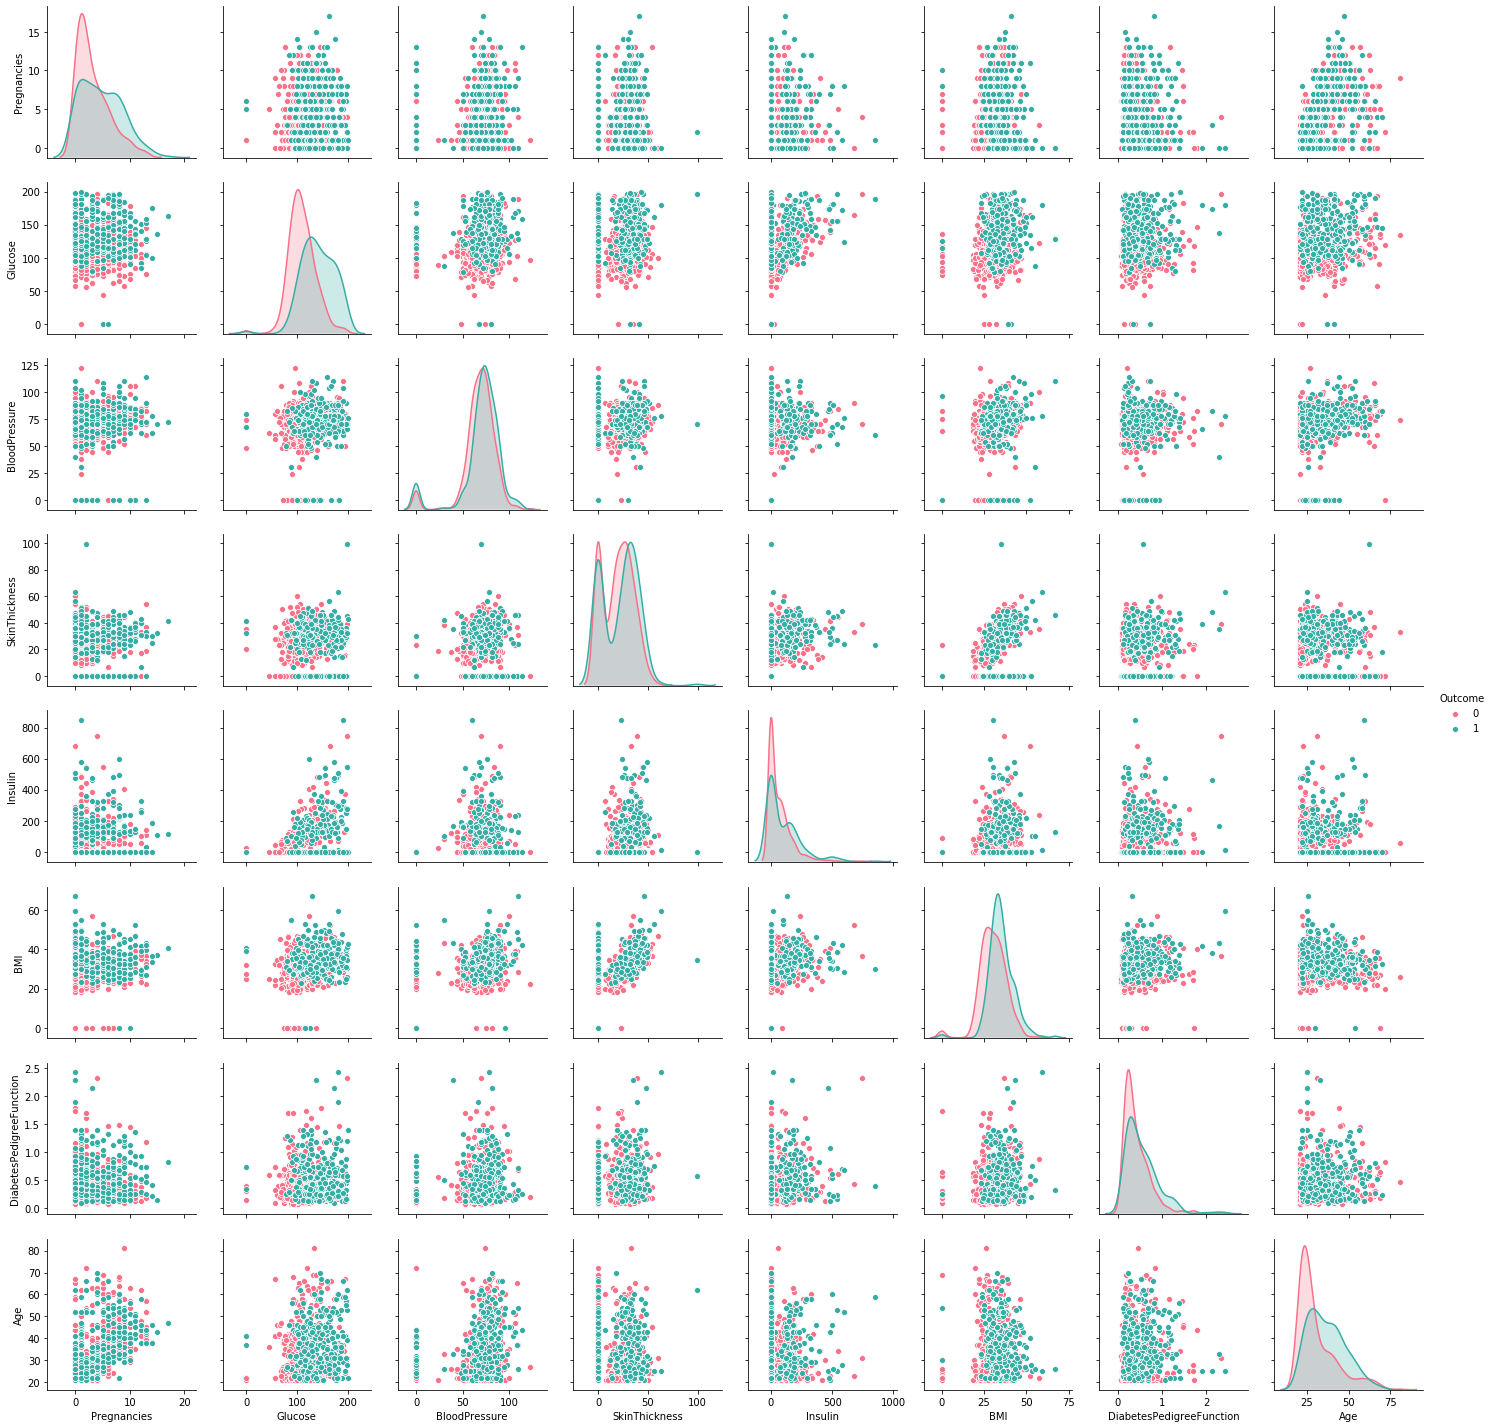

In [4]:
sns.pairplot(df, hue="Outcome", palette="husl", vars=x_features)

<hr>


### <a name="M24">2.4. Creacción y ajuste de los modelos</a>


* Al tratarse de un ejemplo con fines didácticos vamos a crear una colección de modelos con solo 4 árboles de decisión, teniendo estos árboles una profuncidad de 3 hojas.


* Esto se hace así para poder ver como el Random Forest crear una colección de modelos independientes y para ver de forma visual como quedan los árboles de decisión (de ahí que solo tengan una profundidad de 3 niveles)


* Cuando se trabaje en un problema real se debería de crear una colección de modelos con bastantes más modelos para obtener mejores resultados de los que vamos a obtener en este ejemplo.

In [5]:
rfc = RandomForestClassifier(n_estimators=4, bootstrap=True, criterion='gini', max_depth=3, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<hr>


### <a name="M25">2.5. Visualización de los Árboles obtenidos</a>


* Una vez creada la colección de los arboles de decisión, vamos a visualizarlos para ver que decisiones toman cada uno de ellos por separado en función del valor de las variables.


* En primer lugar vamos a obtener la lista de modelos:

In [6]:
models = rfc.estimators_
models

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=209652396, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=398764591, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features='auto', max_leaf_nodes=None,
                        min_

* Pasamos a pintar cada uno de los 4 árboles:

In [7]:
def graph_tree(model, feature_names, class_names):
    """
    Función que crea el gráfico del arbol de decisión
    model: modelo del árbol de decisión
    feature_names: lista con el nombre de las variables de entrada
    class_names: lista con el nombre de las clases
    """
    dot_data = export_graphviz(model, feature_names=feature_names, class_names=class_names, 
                               out_file=None, filled=True, rounded=True)
    
    graph = pydotplus.graph_from_dot_data(dot_data)

    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]

    return graph

Arbol de Decisión 1


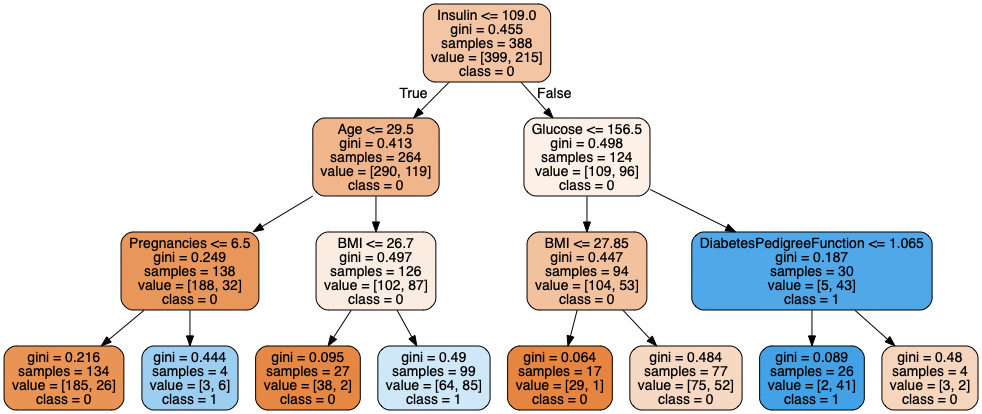

In [8]:
print("Arbol de Decisión 1")
graph = graph_tree(model=models[0], feature_names=x_features, class_names=['0', '1'])
Image(graph.create_png())

Arbol de Decisión 2


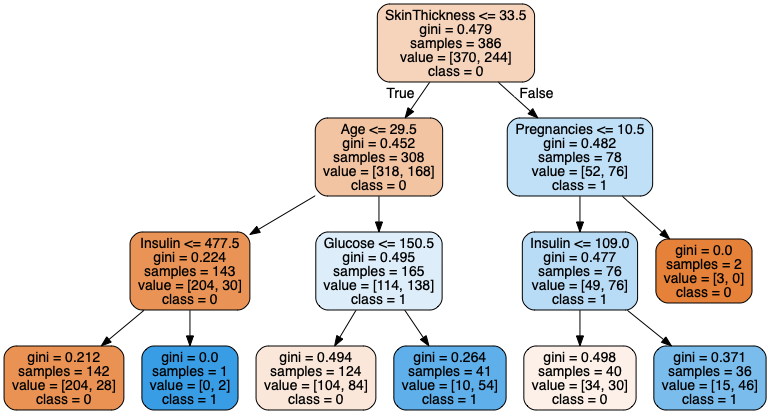

In [9]:
print("Arbol de Decisión 2")
graph = graph_tree(model=models[1], feature_names=x_features, class_names=['0', '1'])
Image(graph.create_png())

Arbol de Decisión 3


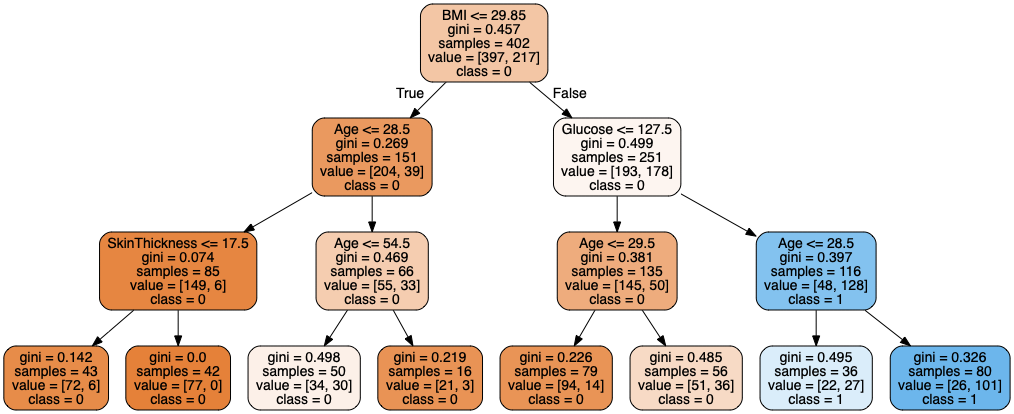

In [10]:
print("Arbol de Decisión 3")
graph = graph_tree(model=models[2], feature_names=x_features, class_names=['0', '1'])
Image(graph.create_png())

Arbol de Decisión 4


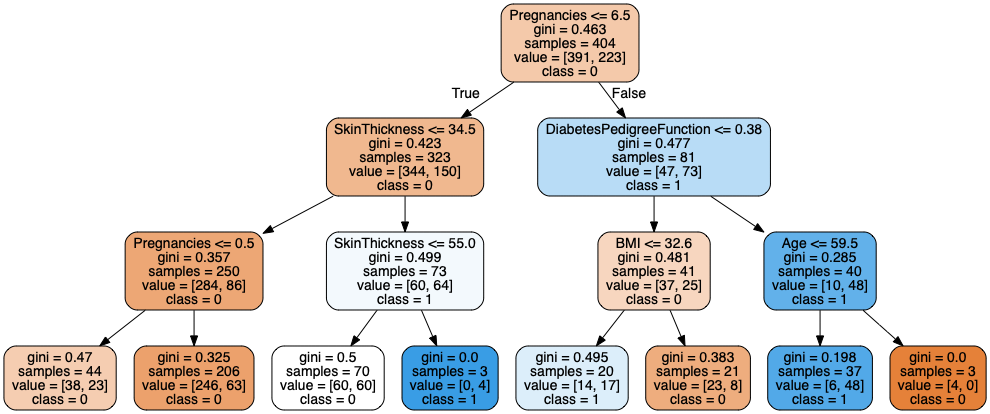

In [11]:
print("Arbol de Decisión 4")
graph = graph_tree(model=models[3], feature_names=x_features, class_names=['0', '1'])
Image(graph.create_png())

<hr>


### <a name="M26">2.6. Evaluación de los modelos</a>

* Para cada uno de los árboles de la colección y para el Random Forest vamos a calcular las siguientes métricas de evaluación:

    + Accuracy
    + F1
    + Precision
    + Recall
    + AUC_ROC

In [12]:
def evaluation(model, name, X_train, y_train, X_test, y_test):
    """
    Función de devuelve en un diccionario las métricas de evaluación de 
    Accuracy, Precision, Recall, F1 y AUC_ROC para los conjuntos de datos de entrenamiento y test
        model: modelo a evaluar
        name: nombre del modelo
        X_train: Variables de entrada del conjunto de datos de entrenamiento
        y_train: Variable de salida del conjunto de datos de entrenamiento
        X_test: Variables de entrada del conjunto de datos de test
        y_test: Variable de salida del conjunto de datos de test
        return: diccionario con el nombre del modelo y el valor de las métricas
    """
    model_dict = {}
    model_dict['name'] = name
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_prob_train = model.predict_proba(X_train)
    y_prob_test = model.predict_proba(X_test)
    model_dict['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['auc_roc_train'] = roc_auc_score(y_true=y_train, y_score=y_prob_train[:, 1])
    model_dict['auc_roc_tests'] = roc_auc_score(y_true=y_test, y_score=y_prob_test[:, 1])
    
    return model_dict


# Lista de diccionarios para guardar los resultados de la evaluación de los modelos
evaluacion = list()

# Calculamos las métricas del Random Forest y lo añadimos a la lista
evaluacion.append(evaluation(model=rfc, name='Random Forest', 
                             X_train=X_train, y_train=y_train, 
                             X_test=X_test, y_test=y_test))

# Calculamos las métricas de los modelos por separado
for index, model in enumerate(rfc.estimators_):
    evaluacion.append(evaluation(model=model, name='CART {}'.format(index + 1), 
                             X_train=X_train, y_train=y_train, 
                             X_test=X_test, y_test=y_test))

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests,auc_roc_train,auc_roc_tests
name,,,,,,,,,,
Random Forest,0.776873,0.759740,0.744186,0.638889,0.579186,0.489362,0.651399,0.554217,0.833673,0.751640
CART 1,0.695440,0.662338,0.580189,0.448980,0.556561,0.468085,0.568129,0.458333,0.745346,0.651223
CART 2,0.719870,0.746753,0.684211,0.653846,0.411765,0.361702,0.514124,0.465753,0.730378,0.641479
CART 3,0.770358,0.772727,0.729885,0.666667,0.574661,0.510638,0.643038,0.578313,0.824491,0.780573
CART 4,0.687296,0.707792,0.643564,0.538462,0.294118,0.297872,0.403727,0.383562,0.662867,0.629946


* A continuación mostramos la matriz de confusión del Random Forest para los datos de entrenamiento y test

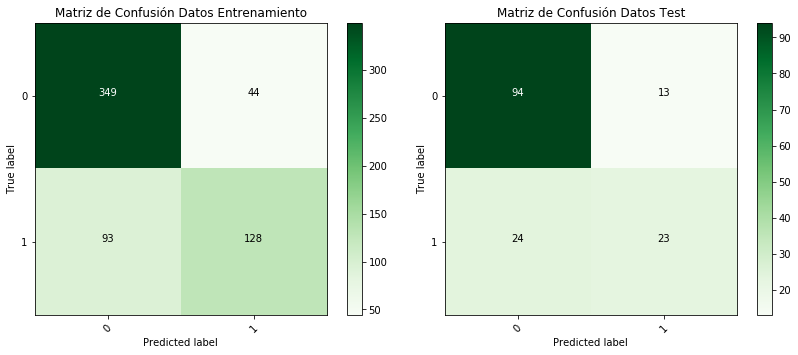

In [13]:
# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Obtenemos las matrices de confusión
cfm_train = confusion_matrix(y_true=y_train, y_pred=rfc.predict(X_train))
cfm_test = confusion_matrix(y_true=y_test, y_pred=rfc.predict(X_test))

# Pintamos las matrices de confusión
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cfm_train, classes=['0', '1'], title='Matriz de Confusión Datos Entrenamiento')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cfm_test, classes=['0', '1'], title='Matriz de Confusión Datos Test')
plt.show()

<hr>


### <a name="M27">2.7. Conclusiones</a>


* Podemos observar que pese a crear el Random Forest una colección de solo 4 modelos, la predicción agregada de los 4 modelos independientes devuelve unos resultados en general mejores que lo obtenidos por cada unos de los modelos por separado.


* Quedaría pendiente revisar la complejidad (número de niveles) de los árboles de decisión de la colección para tener un error similar con los datos de entrenamiento y test, aunque los resultados que hemos obtenido en el ejercicio son bastante similares.

<hr>


Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.


<img src="../../imgs/CC_BY-NC-SA.png" alt="CC BY-NC">